In [1]:
print('Hello World')

Hello World


In [41]:
#List Foundation Models in AWS Bedrock
import boto3

bedrock = boto3.client('bedrock')
response = bedrock.list_foundation_models()
models = response['modelSummaries']
for model in models:
    info = '{:40s}\t{}'.format(model['modelName'], model['modelId'])
    print(info)


Titan Text Large                        	amazon.titan-tg1-large
Titan Text Embeddings v2                	amazon.titan-embed-g1-text-02
Titan Text G1 - Lite                    	amazon.titan-text-lite-v1:0:4k
Titan Text G1 - Lite                    	amazon.titan-text-lite-v1
Titan Text G1 - Express                 	amazon.titan-text-express-v1:0:8k
Titan Text G1 - Express                 	amazon.titan-text-express-v1
Titan Embeddings G1 - Text              	amazon.titan-embed-text-v1:2:8k
Titan Embeddings G1 - Text              	amazon.titan-embed-text-v1
Titan Text Embeddings V2                	amazon.titan-embed-text-v2:0:8k
Titan Text Embeddings V2                	amazon.titan-embed-text-v2:0
Titan Multimodal Embeddings G1          	amazon.titan-embed-image-v1:0
Titan Multimodal Embeddings G1          	amazon.titan-embed-image-v1
Titan Image Generator G1                	amazon.titan-image-generator-v1:0
Titan Image Generator G1                	amazon.titan-image-generator-v1
SDXL 1.0 

In [42]:
import json
import boto3

#Describe las operaciones de la API para ejecutar inferencias mediante modelos de Amazon Bedrock.
bedrock = boto3.client(service_name='bedrock-runtime')

modelId = 'ai21.j2-ultra'
accept = 'application/json'
contentType = 'application/json'
prompt = """Explain what general relativity is to an 8 year old."""
input = {'prompt': prompt,
         'maxTokens': 1024,
         'temperature': 0.3,
         'topP': 1.0,
         'stopSequences': [],
         'countPenalty': {'scale': 0},
         'presencePenalty': {'scale': 0},
         'frequencyPenalty': {'scale': 0}
        }
body = json.dumps(input)
print("Body : ",body)
print("")

#Invoca el modelo de Amazon Bedrock especificado
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
print("Response :", response)
print("")

#Diccionario con la respuesta en la llave completions
response_body = json.loads(response.get('body').read())
completions = response_body['completions']

print("Respuesta del modelo :")
for part in completions:
    print(part['data']['text'])

Body :  {"prompt": "Explain what general relativity is to an 8 year old.", "maxTokens": 1024, "temperature": 0.3, "topP": 1.0, "stopSequences": [], "countPenalty": {"scale": 0}, "presencePenalty": {"scale": 0}, "frequencyPenalty": {"scale": 0}}

Response : {'ResponseMetadata': {'RequestId': '4707ce06-05de-44cb-a46f-b2a9b329b1cf', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Thu, 16 May 2024 22:14:08 GMT', 'content-type': 'application/json', 'content-length': '12334', 'connection': 'keep-alive', 'x-amzn-requestid': '4707ce06-05de-44cb-a46f-b2a9b329b1cf', 'x-amzn-bedrock-invocation-latency': '1530', 'x-amzn-bedrock-output-token-count': '65', 'x-amzn-bedrock-input-token-count': '9'}, 'RetryAttempts': 0}, 'contentType': 'application/json', 'body': <botocore.response.StreamingBody object at 0x7f05932cd810>}

Respuesta del modelo :

General relativity is a theory of gravity that says that gravity is not just an invisible force that pulls things towards each other, but is actually the bend

In [20]:
import logging
#boto3.set_stream_logger('', logging.DEBUG) #Logs de los procesos que ocurran al hacer una petición a la API
boto3.set_stream_logger('', logging.INFO) #Desactivar Logs

In [23]:
import json
import boto3

bedrock = boto3.client(service_name='bedrock-runtime')

modelId = 'amazon.titan-text-lite-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """Explain what general relativity is to an 8 year old."""
input = {'inputText': prompt,
         'textGenerationConfig': {
              'maxTokenCount': 1024,
              'stopSequences': [],
              'temperature': 0,
              'topP': 1
        }
    }
body = json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
completions = response_body['results']
for part in completions:
    print(part['outputText'])



General relativity is a very complicated and interesting part of physics. It explains gravity and space-time. It says that gravity is not a force that pulls things together, but a way that space-time curves around things. This means that gravity affects not only objects but also the way we move and the speed at which things move. General relativity also helps us to understand things like black holes and the formation of galaxies. It is a very important theory in modern physics and helps us to understand the universe better.


In [25]:
#Anthropic Claude 3 Sonnet (Text & Vision) 

import json
import boto3

bedrock = boto3.client(service_name='bedrock-runtime')

modelId = 'anthropic.claude-3-sonnet-20240229-v1:0'
accept = 'application/json'
contentType = 'application/json'
prompt = """Explain what general relativity is to an 8 year old."""

user_message = {'role': 'user', 'content': prompt}
messages = [user_message]
input = {
    'anthropic_version': 'bedrock-2023-05-31',
    'max_tokens': 1024,
    'system': '',
    'messages': messages
}

body = json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
completions = response_body['content']
for part in completions:
    print(part['text'])


General relativity is a theory developed by a very smart scientist named Albert Einstein. It explains how gravity works in our universe.

In this theory, Einstein said that gravity is not really a force pulling objects together. Instead, it's caused by the way massive objects (like planets and stars) curve or bend the fabric of space and time around them.

Imagine a big rubber sheet stretched tight. If you place a heavy ball, like a bowling ball, on the sheet, it will cause a dip or curve in the sheet. If you roll a smaller ball, like a marble, near the bowling ball, the marble will roll towards the dip caused by the heavy bowling ball. This is similar to how planets and other objects move in the curved space-time caused by massive objects like stars and black holes.

Einstein's theory also says that space and time are not separate things, but they are connected and form a unified entity called "space-time." The presence of massive objects distorts or warps the space-time around them, 

In [26]:
#Streaming API

#En los ejemplos anteriores, usamos la API InvokeModel (el método de Python) para invocar un modelo básico.
#El método no se devuelve hasta que el texto generado se haya generado en su totalidad.
#Esto puede dar la impresión de que hay un problema de rendimiento porque se necesita tiempo para ver la respuesta.
#Con Amazon Bedrock, también tenemos la capacidad de recibir el texto generado en fragmentos, dando la impresión de una conversación en tiempo real.
#Esto se hace con la API InvokeModelWithResponseStream (el método en Python).invoke_model() invoke_model() invoke_model_with_response_stream()
import json
import boto3

bedrock = boto3.client(service_name='bedrock-runtime')

modelId = 'anthropic.claude-3-sonnet-20240229-v1:0'
accept = 'application/json'
contentType = 'application/json'
prompt = """explain general relativity to a university professor with 1000 words."""

user_message = {'role': 'user', 'content': prompt}
messages = [user_message]
input = {
    'anthropic_version': 'bedrock-2023-05-31',
    'max_tokens': 1024,
    'system': '',
    'messages': messages
}

body = json.dumps(input)
response = bedrock.invoke_model_with_response_stream(body=body, modelId=modelId, accept=accept, contentType=contentType)
for event in response.get('body'):
        chunk = json.loads(event['chunk']['bytes'])
        if chunk['type'] == 'content_block_delta':
            if chunk['delta']['type'] == 'text_delta':
                print(chunk['delta']['text'], end='')


General Relativity, proposed by Albert Einstein in 1915, is a profound theory that revolutionized our understanding of gravity, space, and time. It is a geometric theory that describes the fabric of the universe itself, unifying the concepts of space and time into a single entity known as spacetime.

At the heart of General Relativity lies the principle of equivalence, which states that the effects of gravity and acceleration are indistinguishable. This idea was a departure from Newton's conception of gravity as a force acting between masses. Instead, Einstein proposed that gravity is a manifestation of the curvature of spacetime caused by the presence of matter and energy.

According to General Relativity, spacetime is not a fixed, unchanging background, but rather a dynamic entity that can be distorted by massive objects. Just as a heavy ball placed on a stretched rubber sheet would cause it to curve and deform, massive objects like stars and galaxies distort the fabric of spacetime 

In [27]:
#Todos los modelos de lenguaje grandes generan una palabra a la vez. 
#Depende del modelo decidir si enviar el texto generado como un bloque o como una secuencia.
#Solo puede usar la API de streaming para invocar un modelo cuando el modelo admite el streaming, de lo contrario, la llamada a la API produce una ValidationException.

#En el código de ejemplo siguiente se muestra si un modelo básico admite la transmisión por secuencias o no examinando el atributo
#responseStreamingSupported en los resúmenes del modelo.
import boto3

bedrock = boto3.client('bedrock')
response = bedrock.list_foundation_models()
models = response.get('modelSummaries')
for model in models:
    print('{0}\t{1}'.format(model.get('responseStreamingSupported'), model.get('modelId')))


True	amazon.titan-tg1-large
None	amazon.titan-embed-g1-text-02
True	amazon.titan-text-lite-v1:0:4k
True	amazon.titan-text-lite-v1
True	amazon.titan-text-express-v1:0:8k
True	amazon.titan-text-express-v1
False	amazon.titan-embed-text-v1:2:8k
False	amazon.titan-embed-text-v1
False	amazon.titan-embed-text-v2:0:8k
False	amazon.titan-embed-text-v2:0
None	amazon.titan-embed-image-v1:0
None	amazon.titan-embed-image-v1
None	amazon.titan-image-generator-v1:0
None	amazon.titan-image-generator-v1
None	stability.stable-diffusion-xl-v1:0
None	stability.stable-diffusion-xl-v1
False	ai21.j2-grande-instruct
False	ai21.j2-jumbo-instruct
False	ai21.j2-mid
False	ai21.j2-mid-v1
False	ai21.j2-ultra
False	ai21.j2-ultra-v1:0:8k
False	ai21.j2-ultra-v1
True	anthropic.claude-instant-v1:2:100k
True	anthropic.claude-instant-v1
True	anthropic.claude-v2:0:18k
True	anthropic.claude-v2:0:100k
True	anthropic.claude-v2:1:18k
True	anthropic.claude-v2:1:200k
True	anthropic.claude-v2:1
True	anthropic.claude-v2
True	anthro

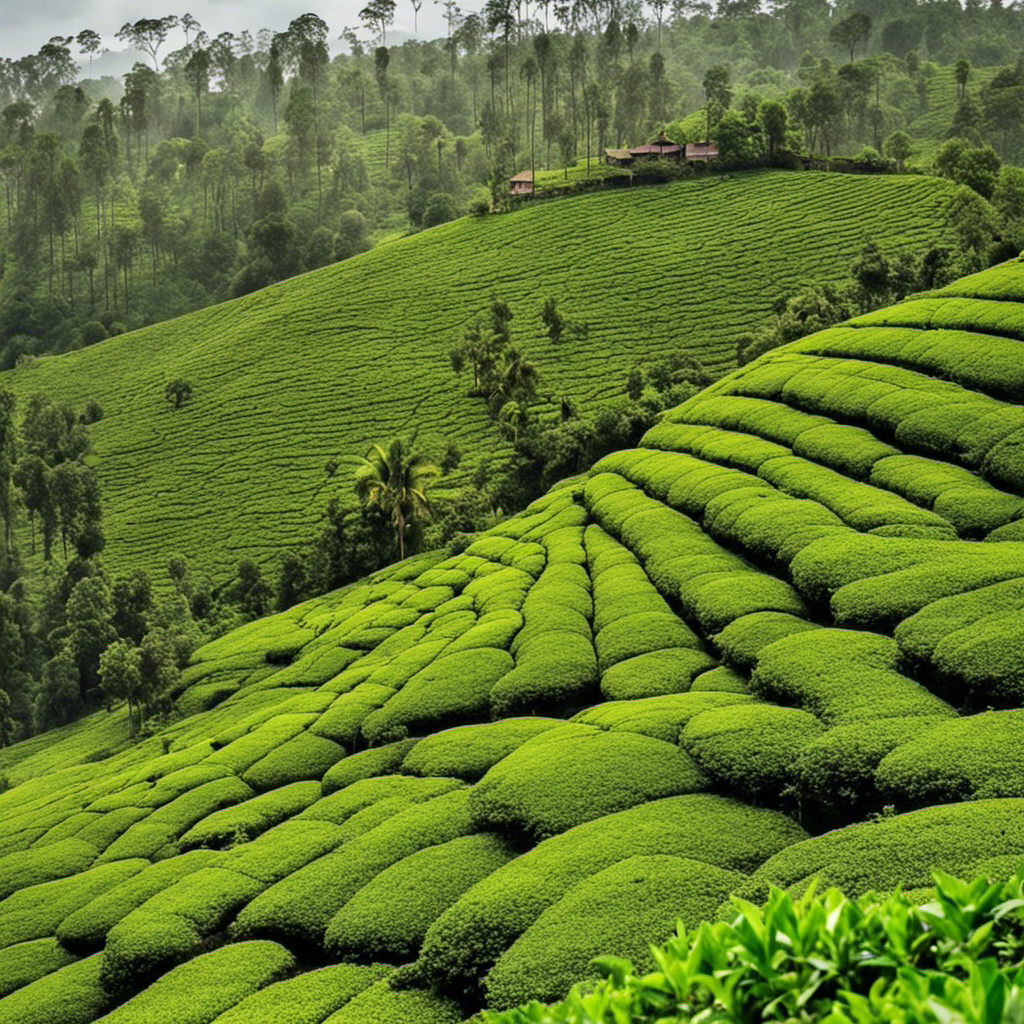

In [ ]:
import json
import boto3
import uuid
from PIL import Image
from io import BytesIO
from base64 import b64encode
from base64 import b64decode
from IPython.display import display

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'stability.stable-diffusion-xl-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Sri lanka tea plantation.
"""
input = {
        'text_prompts': [{'text': prompt}],
        'cfg_scale': 10,
        'seed': 0,
        'steps': 50
    }
body = json.dumps(input) 
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response = json.loads(response.get('body').read())
images = response.get('artifacts')
for image in images:
    current = Image.open(BytesIO(b64decode(image.get('base64'))))
    filename = str(uuid.uuid4()) + '.png'
    current.save(filename)
    display(Image.open(filename))


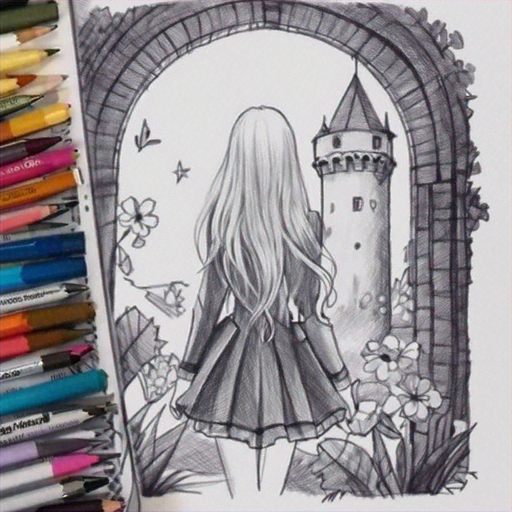

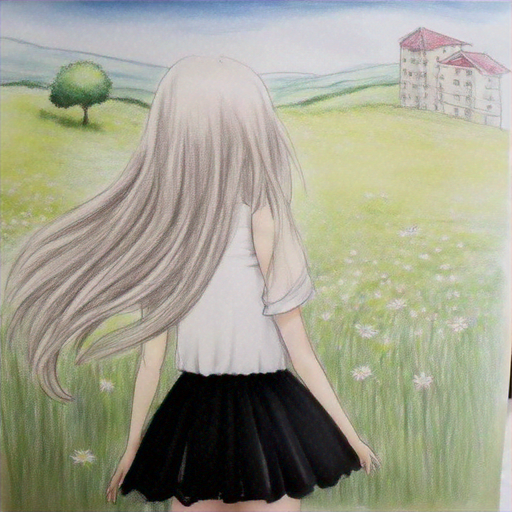

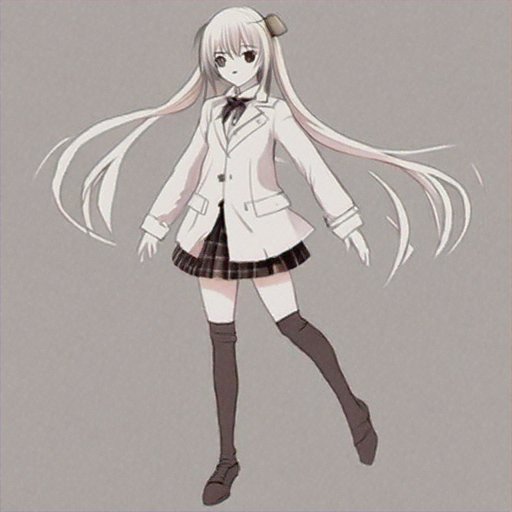

In [35]:
import json
import boto3
import uuid
from PIL import Image
from io import BytesIO
from base64 import b64encode
from base64 import b64decode
from IPython.display import display

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'amazon.titan-image-generator-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """Dibuja una IA con vida"""
input = {
    'textToImageParams': {'text': prompt},
    'taskType': 'TEXT_IMAGE',
    'imageGenerationConfig': {
        'cfgScale': 8,
        'seed': 0,
        'quality': 'standard',
        'width': 512,
        'height': 512,
        'numberOfImages':3
    }
}
body = json.dumps(input) 
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response = json.loads(response.get('body').read())
images = response.get('images')
for image in images:
    current = Image.open(BytesIO(b64decode(image)))
    filename = str(uuid.uuid4()) + '.png'
    current.save(filename)
    display(Image.open(filename))


In [36]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'amazon.titan-text-lite-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Product: Sunglasses. 
Keywords: polarized, designer, comfortable, UV protection, aviators. 

Create a table that contains five variations of a detailed product description for the product listed above, each variation of the product description must use all the keywords listed.
"""
input = {
        'inputText': prompt,
        'textGenerationConfig': {
              'maxTokenCount': 4096,
              'stopSequences': [],
              'temperature': 0,
              'topP': 1
        }
    }
body = json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())
results = response_body['results']
for result in results:
    print(result['outputText'])


|Variation|Description|
|-|-|
|Polarized Sunglasses|Introducing our premium polarized sunglasses, the ultimate accessory for style and protection. These sleek and stylish sunglasses feature high-quality lenses that eliminate glare and enhance visual clarity, making them perfect for outdoor activities or simply enjoying the sun in style. With a variety of frame styles and colors to choose from, these sunglasses are the perfect choice for anyone looking to elevate their fashion game while also protecting their eyes from harmful UV rays.|
|Designer Sunglasses|Upgrade your style with our premium designer sunglasses. These high-quality sunglasses are crafted with precision and feature frames that are both stylish and comfortable. With a variety of lens options, including polarized and UV protection, these sunglasses are the perfect choice for anyone looking to make a fashion statement while also protecting their eyes from the sun's harmful rays.|
|Comfortable Sunglasses|Experience the ultim

In [37]:
import json
import boto3

def invoke_model(client, prompt, model, 
    accept = 'application/json', content_type = 'application/json',
    max_tokens  = 512, temperature = 1.0, top_p = 1.0, top_k = 250, stop_sequences = [],
    count_penalty = 0, presence_penalty = 0, frequency_penalty = 0, return_likelihoods = 'NONE'):
    # default response
    output = ''
    # identify the model provider
    provider = model.split('.')[0] 
    # InvokeModel
    if (provider == 'anthropic'): 
        user_message = {'role': 'user', 'content': prompt}
        messages = [user_message]
        input = {
            'anthropic_version': 'bedrock-2023-05-31',
            'system': '',
            'messages': messages,
            'max_tokens': max_tokens, 
            'temperature': temperature,
            'top_k': top_k,
            'top_p': top_p,
            'stop_sequences': stop_sequences
        }
        body = json.dumps(input)
        response = client.invoke_model(body=body, modelId=model, accept=accept, contentType=content_type)
        response_body = json.loads(response.get('body').read())
        completions = response_body['content']
        for part in completions:
            output = output + part['text']
    elif (provider == 'ai21'): 
        input = {
            'prompt': prompt, 
            'maxTokens': max_tokens,
            'temperature': temperature,
            'topP': top_p,
            'stopSequences': stop_sequences,
            'countPenalty': {'scale': count_penalty},
            'presencePenalty': {'scale': presence_penalty},
            'frequencyPenalty': {'scale': frequency_penalty}
        }
        body = json.dumps(input)
        response = client.invoke_model(body=body, modelId=model, accept=accept, contentType=content_type)
        response_body = json.loads(response.get('body').read())
        completions = response_body['completions']
        for part in completions:
            output = output + part['data']['text']
    elif (provider == 'amazon'): 
        input = {
            'inputText': prompt,
            'textGenerationConfig': {
                  'maxTokenCount': max_tokens,
                  'stopSequences': stop_sequences,
                  'temperature': temperature,
                  'topP': top_p
            }
        }
        body = json.dumps(input)
        response = client.invoke_model(body=body, modelId=model, accept=accept, contentType=content_type)
        response_body = json.loads(response.get('body').read())
        results = response_body['results']
        for result in results:
            output = output + result['outputText']
    elif (provider == 'cohere'): 
        input = {
            'prompt': prompt, 
            'max_tokens': max_tokens,
            'temperature': temperature,
            'k': top_k,
            'p': top_p,
            'stop_sequences': stop_sequences,
            'return_likelihoods': return_likelihoods
        }
        body = json.dumps(input)
        response = client.invoke_model(body=body, modelId=model, accept=accept, contentType=content_type)
        response_body = json.loads(response.get('body').read())
        results = response_body['generations']
        for result in results:
            output = output + result['text']
    elif (provider == 'meta'): 
        input = {
            'prompt': prompt,
            'max_gen_len': max_tokens,
            'temperature': temperature,
            'top_p': top_p
        }
        body = json.dumps(input)
        response = client.invoke_model(body=body, modelId=model, accept=accept, contentType=content_type)
        response_body = json.loads(response.get('body').read())
        output = response_body['generation']
    # return
    return output

# main function
bedrock = boto3.client(
    service_name='bedrock-runtime'
)
model  = 'anthropic.claude-3-sonnet-20240229-v1:0'
prompt = """
Explain how chicken swim to an 8 year old using 2 paragraphs.
"""
output = invoke_model(client=bedrock, prompt=prompt, model=model)
print(output)


Here's how you can explain how chickens swim to an 8-year-old using two paragraphs:

Paragraph 1:
Chickens are birds that are usually found on farms or in backyards, and they are known for their ability to lay eggs and provide us with tasty meat. However, did you know that chickens can also swim? Yes, that's right! Even though chickens are not naturally great swimmers, they can paddle through water with their feet and wings if they need to. This might seem surprising because we usually see chickens walking around on land, but their feathers are water-resistant, which means they can stay dry and float on water for a short time.

Paragraph 2:
Chickens might need to swim if they accidentally fall into a pond or if there is a heavy rainstorm that causes flooding in their coop. When they find themselves in water, they use their wings to help them stay afloat and their feet to paddle around. However, chickens cannot swim for very long periods because they can get tired easily. If they are in

In [38]:
# main function
bedrock = boto3.client(service_name='bedrock-runtime')
model  = 'cohere.command-text-v14'
prompt = """Explain how chicken swim to an 8 year old using 2 paragraphs."""

output = invoke_model(client=bedrock, prompt=prompt, model=model)
print(output)

 Chicken are made of up very small particles, so small you can't see with your eyes, which is why things like an X-ray machine is needed. These particles are held together by a force called faith, but that is a story for another time. Chicken, as in most birds, have very light parts that allows them to float on water, in the form of their feathers, which makes up most of the chicken's body mass. Have you ever seen a chicken float on water?

Because the chicken's body is very light compared to water, they have a hard time staying afloat. Now the question is, why do you think chickens tilt their bodies so much and use their legs to move forward? If you said that it helps them move forward on land, you are right. Chickens can do that with their legs, they can also use his arms and wings to help them swim. 

Do you see anymore ways the chickens are adapting to try and swim? They actually do a lot of things together to help themselves swim, they hold their feathers close to their body durin